# Guia de Testes de Hipóteses

Rafael Pavan

Neste guia, iremos aprender e aplicar os seguintes testes de hipóteses:
    
   - Teste-T para uma Amostra
   - Wilcoxon para uma Amostra
   - Teste-T Paramétrico
   - Teste de Mann-Whitney
   - Teste-T Não Paramétrico
   - Teste ANOVA
   - Teste ANOVA - 2WAY

## 1. Interpretação do P-Value

O p-value apenas indica a chance de se obter um valor igualmente raro ou mais raro que um determinado valor de referência. O nível de significância é de escolha do usuário, geralmente adotado como sendo 0.05. 

- Rejeita Hipótese Nula de que Não Há Significância (pvalue < 0.05)

- Rejeita Hipótese Alternativa de que Há Significância (pvalue > 0.05) 

## 2. Teste-T para uma Amostra

Objetivo: Checar o valor médio de uma amostra de dados em relação a um valor de referência.

Premissas: 

   - Os dados devem ser normalmente distribuídos.
   

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

def check_normal(data):
    
    _ = stats.probplot(data, plot=plt)
    plt.grid()
    
    
    _, pVal = stats.normaltest(data)

    if pVal > 0.05:
        
        print(f'Podemos assumir que a distribuição dos dados é normal. P-value: {pVal} ')
        
    else:
        
        
        print(f'Não Podemos assumir que a distribuição dos dados é normal. P-value: {pVal} ')
        

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html
    

### Exemplo

Se coletarmos 400 dados normalmente distribuídos de uma população, sendo que os dados coletados apresentam média 7.0, desvio padrão 1.12 e desvio padrão da média  de 0.312, qual a chance de que a média real tenha valor de 6.8? E 2?

Podemos assumir que a distribuição dos dados é normal. P-value: 0.748456351796024 


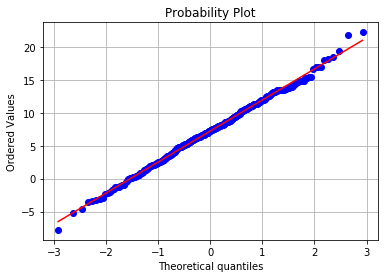

In [2]:
amostra = np.random.normal(7.0, 4.5, 400)
check_normal(amostra)


O observador sabe que a distribuição das médias das amostras segue uma distribuição T, e que o SEM caracteriza a largura da distribuição

In [3]:
t, pVal2 = stats.ttest_1samp(amostra,6.9,alternative='two-sided')
t, pValless = stats.ttest_1samp(amostra,6.9,alternative='less')
t, pValgreater = stats.ttest_1samp(amostra,6.9,alternative='greater')
# This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.

In [4]:
print(f'P-value para o teste two-sided (h0: {6.9} não é diferente da média da população): {pVal2}')

P-value para o teste two-sided (h0: 6.9 não é diferente da média da população): 0.13637397726386102


O valor P é maior que 0.05 e indica forte evidência para a hipótese nula que assume não haver diferença significativa entre a média da população e o valor desejado.

In [5]:
t, pVal2 = stats.ttest_1samp(amostra,2,alternative='two-sided')
t, pValless = stats.ttest_1samp(amostra,2,alternative='less')
t, pValgreater = stats.ttest_1samp(amostra,2,alternative='greater')
# This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.

In [6]:
print(f'P-value para o teste two-sided (h0: {2} não é diferente da média da população): {pVal2}')
print(f'P-value para o teste one-sided (h0: média da população não é < 2): {pValless}')
print(f'P-value para o teste one-sided (h0: média da população não é > 2): {pValgreater}')

P-value para o teste two-sided (h0: 2 não é diferente da média da população): 1.9055691516531825e-72
P-value para o teste one-sided (h0: média da população não é < 2): 1.0
P-value para o teste one-sided (h0: média da população não é > 2): 9.527845758265912e-73


O valor P é menor que 0.05 e indica forte evidência para a hipótese alternativa que assume que há diferença significativa entre a média da população e o valor desejado. No caso, 2 é menor que a média da população.

## 3. Wilcoxon para uma Amostra

Objetivo: Checar o valor médio de uma amostra de dados em relação a um valor de referência.

Premissas: 

   - Os dados não são normalmente distribuídos 

Não Podemos assumir que a distribuição dos dados é normal. P-value: 3.5595667644028286e-55 


0.49903353090405733

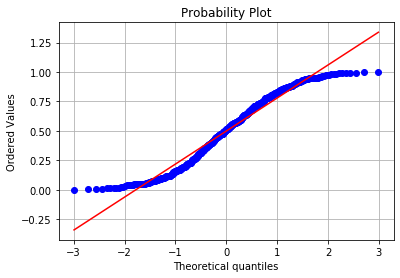

In [7]:
amostra = np.random.rand(500)
check_normal(amostra)
np.mean(amostra)

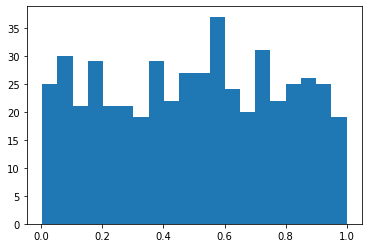

In [8]:
plt.hist(amostra,bins=20)
plt.show()

O teste analisa se a distribuição dos dados subtraídos do valor desejado é simétrica em torno de 0. Vamos testar para os casos de valores 2 e 0.5. Os dados da amostra variam uniformemente de 0 a 1.

### Exemplo

In [9]:
t, pVal2 = stats.wilcoxon(amostra-2,alternative='two-sided')
t, pValless = stats.wilcoxon(amostra-2,alternative='less')
t, pValgreater = stats.wilcoxon(amostra-2,alternative='greater')
# This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.
# The Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution. In particular, it tests whether the distribution of the differences x - y is symmetric about zero. It is a non-parametric version of the paired T-test.

In [10]:
print(f'P-value para o teste two-sided (h0: {2} não é diferente da média da população): {pVal2}')
print(f'P-value para o teste one-sided (h0: a média da população não é < que {2}): {pValless}')
print(f'P-value para o teste one-sided (h0: a média da população não é > que {2}): {pValgreater}')

P-value para o teste two-sided (h0: 2 não é diferente da média da população): 1.2647189486921487e-83
P-value para o teste one-sided (h0: a média da população não é < que 2): 6.323594743460744e-84
P-value para o teste one-sided (h0: a média da população não é > que 2): 1.0


Rejeitamos a hipótese nula, é diferente (pvalue <0.05) com evidência de 2 ser maior que a média da população.

In [11]:
t, pVal2 = stats.wilcoxon(amostra-0.5,alternative='two-sided')
t, pValless = stats.wilcoxon(amostra-0.5,alternative='less')
t, pValgreater = stats.wilcoxon(amostra-0.5,alternative='greater')
# This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.
# The Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution. In particular, it tests whether the distribution of the differences x - y is symmetric about zero. It is a non-parametric version of the paired T-test.

# The Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution. In particular, it tests whether the distribution of the differences x - y is symmetric about zero. It is a non-parametric version of the paired T-test.

In [12]:
print(f'P-value para o teste two-sided (h0: {0.5} não é diferente da média da população): {pVal2}')
print(f'P-value para o teste one-sided (h0: a média da população não é < que {0.5}: {pValless}')
print(f'P-value para o teste one-sided (h0:a média da população não é > que {0.5}): {pValgreater}')

P-value para o teste two-sided (h0: 0.5 não é diferente da média da população): 0.949184279755131
P-value para o teste one-sided (h0: a média da população não é < que 0.5: 0.4745921398775655
P-value para o teste one-sided (h0:a média da população não é > que 0.5): 0.5254078601224345


Rejeitamos a hipótese alternativa, não é diferente (pvalue >0.05) com evidência de 0.5 não ser diferente da média da população.

## 4. T-Test Paramétrico

Objetivo: Checar o valor médio de uma amostra de dados em relação a um valor médio de outra amostra de dados.

Premissas: 

    - Os dados são normalmente distribuídos 
    - Os dados são da mesma população em tempos distintos 

### Exemplo

Foram registradas as alturas de um grupo de estudantes no ano de 2010. Em 2015, os mesmos estudantes tiveram suas alturas registradas.

Há evidências de que não houve crescimento dos estudantes entre os anos de 2010 e 2015?

In [13]:
amostra1 = np.random.normal(1.60,0.08,25)
amostra2 = amostra1 + np.random.normal(0.035,0.005,25)

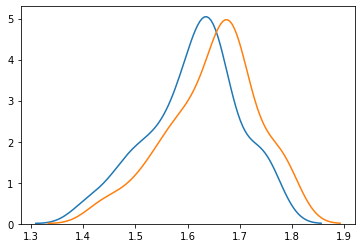

In [14]:
sns.kdeplot(amostra1)
sns.kdeplot(amostra2)

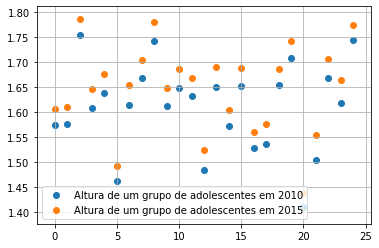

In [15]:
plt.scatter(np.arange(0,len(amostra1),1),amostra1, label='Altura de um grupo de adolescentes em 2010')
plt.scatter(np.arange(0,len(amostra1),1),amostra2, label='Altura de um grupo de adolescentes em 2015')
plt.grid()
plt.legend()

In [16]:
_, pVal = stats.ttest_rel(amostra1,amostra2)

_, pValless = stats.ttest_rel(amostra1,amostra2,alternative='less')

_, pValgreater = stats.ttest_rel(amostra1,amostra2,alternative='greater')


#This is a two-sided test for the null hypothesis that 2 related or repeated samples have identical average (expected) values.

In [17]:
print(f'P-value para o teste two-sided (h0: não é diferente): {pVal}')
print(f'P-value para o teste one-sided (h0: a média de a1 não é < que a média de a2): {pValless}')
print(f'P-value para o teste one-sided (h0: a média de a1 não é > que a média de a2): {pValgreater}')

P-value para o teste two-sided (h0: não é diferente): 1.3692179049400965e-22
P-value para o teste one-sided (h0: a média de a1 não é < que a média de a2): 6.846089524700483e-23
P-value para o teste one-sided (h0: a média de a1 não é > que a média de a2): 1.0


Há evidências para rejeitar a hipótese nula, ou seja, há evidências de que as médias das amostras são diferentes, sendo que a amostra 1 tem evidências de ter média menor que a amostra 2.

## 4. T-Test Grupos Independentes

Objetivo: Checar o valor médio de uma amostra de dados em relação a um valor médio de outra amostra de dados.

Premissas: 

    - Os dados são normalmente distribuídos 
    - Os dados são de diferentes populações

### Exemplo

Queremos saber entre duas fábricas, se há diferença na eficiência do processo de produção. Para isso, registramos o (número total de peças - número de peças defeituosas)/número total de peças produzidas diariamente em um intervalo de um ano em ambas as empresas.

In [18]:
fabrica1 = np.random.normal(0.7,0.07,365)

Podemos assumir que a distribuição dos dados é normal. P-value: 0.41245582750548604 


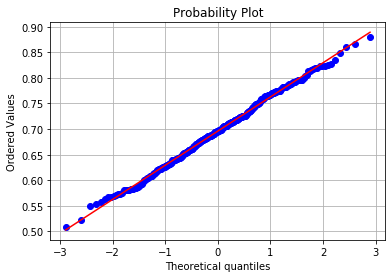

In [19]:
check_normal(fabrica1)

Podemos assumir que a distribuição dos dados é normal. P-value: 0.34747386146916115 


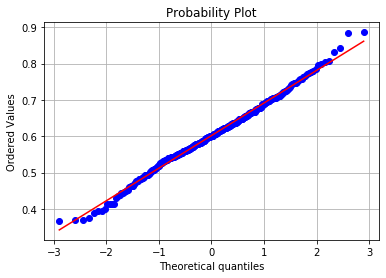

In [20]:
fabrica2 = np.random.normal(0.6,0.09,365)
check_normal(fabrica2)

Fábrica 1 Média da Eficiência 0.6961105248425982
Fábrica 2 Média da Eficiência 0.6019345133503969


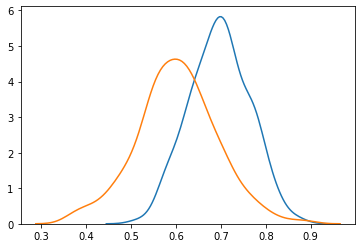

In [21]:
sns.kdeplot(fabrica1)
sns.kdeplot(fabrica2)

print('Fábrica 1 Média da Eficiência', np.mean(fabrica1))

print('Fábrica 2 Média da Eficiência', np.mean(fabrica2))

Pelo plot de densidade observamos que a fábrica 1 possui maior eficiência média que a fábrica 2, aparentemente. Vamos realizar o teste de hipótese.

In [22]:
_, pVal = stats.ttest_ind(fabrica1,fabrica2)

_, pValless = stats.ttest_ind(fabrica1,fabrica2,alternative='less')

_, pValgreater = stats.ttest_ind(fabrica1,fabrica2,alternative='greater')

#This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In [23]:
print(f'P-value para o teste two-sided (h0: não é diferente): {pVal}')
print(f'P-value para o teste one-sided (h0: a média de f1 não é < que a média de f2): {pValless}')
print(f'P-value para o teste one-sided (h0: a média de f1 não é > que a média de f2): {pValgreater}')

P-value para o teste two-sided (h0: não é diferente): 2.3266801597906284e-50
P-value para o teste one-sided (h0: a média de f1 não é < que a média de f2): 1.0
P-value para o teste one-sided (h0: a média de f1 não é > que a média de f2): 1.1633400798953142e-50


Como pvalor < 0.05, rejeitamos a hipótese nula de que não há diferença entre as médias. Como o p-valor<0.05 para o teste 'greater', há evidências de que as eficiências são diferentes, sendo que a fábrica 1 possui eficiência maior que fábrica 2.

## 5. Teste Mann-Whitney 

Objetivo: Checar o valor médio de uma amostra de dados em relação a um valor médio de outra amostra de dados.

Premissas: 

    - Os dados não são normalmente distribuídos 
    - Os dados são de diferentes populações

In [24]:
grupo1 = np.random.uniform(0,1,100)
grupo2 = np.random.uniform(0.7,1.5,100)

In [25]:
u, pVal = stats.mannwhitneyu(grupo1,grupo2)
u, pValless = stats.mannwhitneyu(grupo1,grupo2,alternative='less')
u, pValgreater = stats.mannwhitneyu(grupo1,grupo2,alternative='greater')

In [26]:
print(f'P-value para o teste two-sided (h0: não é diferente): {pVal}')
print(f'P-value para o teste one-sided (h0: a média de g1 não é < que a média de g2): {pValless}')
print(f'P-value para o teste one-sided (h0: a média de g1 não é > que a média de g2): {pValgreater}')

P-value para o teste two-sided (h0: não é diferente): 3.2762916985821033e-25
P-value para o teste one-sided (h0: a média de g1 não é < que a média de g2): 1.6381458492910517e-25
P-value para o teste one-sided (h0: a média de g1 não é > que a média de g2): 1.0


## 6. Teste ANOVA 

Objetivo: Checar se os grupos vem de uma mesma distribuição;
    
Premissas: 

    - Os dados são de populações normalmente distribuídas de igual variância 


In [27]:
# 

#        ‘median’ : Recommended for skewed (non-normal) distributions>

#        ‘mean’ : Recommended for symmetric, moderate-tailed distributions.

#        ‘trimmed’ : Recommended for heavy-tailed distributions.

# The test version using the mean was proposed in the original article of Levene ([2]) while the median and trimmed mean have been studied by Brown and Forsythe ([3]), sometimes also referred to as Brown-Forsythe test.

# The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

In [28]:
grupo1 = np.random.normal(3.8,0.55,100)

grupo2 = np.random.normal(4,0.48,100)

grupo3 = np.random.normal(4.2,0.5,100)

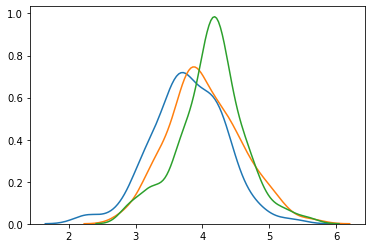

In [29]:
sns.kdeplot(grupo1)
sns.kdeplot(grupo2)
sns.kdeplot(grupo3)

In [30]:
_, pVal=stats.levene(grupo1,grupo2,grupo3, center='mean', proportiontocut=0.05)

if pVal <0.05:
    
    print('Há evidências de que os grupos não possuem igual variância')
    
else:
    
    print('Há evidências de que os grupos possuem igual variância')

Há evidências de que os grupos possuem igual variância


In [31]:
f_stat, pVal = stats.f_oneway(grupo1,grupo2,grupo3)

In [32]:
print(f'P-value para o teste two-sided (h0: não é diferente): {pVal}')

P-value para o teste two-sided (h0: não é diferente): 2.382555496190027e-05


Pelo resultado, rejeitamos a hipótese nula. Há evidências de que os grupos são de distribuições diferentes.

O teste é calculado a partir da hipótese de que dados normalmente distribuídos com iguais variâncias, Var1/Var2 segue uma distribuição F. Do valor de F, encontramos o correspondente pvalue.

## 7. Teste 2Way - ANOVA 

Objetivo: Anova com 2 Fatores. 
    
Premissas: 

    - Os dados são de populações normalmente distribuídas de igual variância 


In [46]:
import pandas as pd

dados = pd.read_csv('https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/Tests/altman_12_6.txt', header=None,names=['hs','fetus','observer'])


In [47]:
dados.head()

,hs,fetus,observer
0,14.3,1,1
1,14.0,1,1
2,14.8,1,1
3,13.6,1,2
4,13.6,1,2


### Exemplo

Foi realizado um experimento onde três observadores mediram a circunferência da cabeça de três fetos. Realize o teste Anova-TwoWay

In [49]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'hs~C(fetus) + C(observer) + C(fetus):C(observer)'

lm = ols(formula,dados).fit()

results = anova_lm(lm)

print(results)

                        df      sum_sq     mean_sq            F        PR(>F)
C(fetus)               2.0  324.008889  162.004444  2113.101449  1.051039e-27
C(observer)            3.0    1.198611    0.399537     5.211353  6.497055e-03
C(fetus):C(observer)   6.0    0.562222    0.093704     1.222222  3.295509e-01
Residual              24.0    1.840000    0.076667          NaN           NaN


Analisando-se o P valor, verifica-se que:
    
    - Diferentes fetos mostram diferentes tamanhos de circunferência de cabeça c(fetus);
    - A escolha do observador acaba também tendo grande impacto na medição c(observer);
    - No entanto, nenhum observador errou de maneira grotesca com nenhum feto c(fetus:observer) 

## 8. Teste 3Way - ANOVA 

Objetivo: Anova com 3 Fatores. 
    
Premissas: 

    - Os dados são de populações normalmente distribuídas de igual variância 


Com mais de 2 fatores é recomendado utilizar modelagem estatística, inspecionando os dados inicialmente através de gráficos. 

# Resumo:

### Groups of Nominal Data

- Nº of Groups Compared: 1
    - Independent Samples: One-Sample T-Test or Wilcoxon Signed Rank Sum Test
 
 
- Nº of Groups Compared: 2 or more
    - Independent Samples: Fisher's exact test or chi-square test
    - Paired Samples: McNemar's Test
    
    


### Groups of Ordinal Data

- Nº of Groups Compared: 2
    - Independent Samples: Man-Whitney U test
    - Paired Samples: Wilcoxon Signed Rank Test
 
 
- Nº of Groups Compared: 3 or more
    - Independent Samples: Krustal-Wallis Test
    - Paired Samples: Friedman Test
   

### Groups of Continuous Data

- Nº of Groups Compared: 2
    - Independent Samples: Student T-Test or Mann Whitney Test
    - Paired Samples: Pareid T-Test or Wilcoxon Signed Rank Sum Test
        
- Nº of Groups Compared: 3 or more
    - Independent Samples: ANOVA or Kruskal-Wallis Test
    - Paired Samples: Repeated Measures ANOVA or Friedman Test